## Lab 2: Monte Carlo Self-Avoiding Walks ##



In [2]:
# Imports
import numpy as np
import scipy.stats as sci
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Question 1: #

A. Ideal polymer.
1. Implement a growing algorithm of an ideal polymer as a random walk process on (i) a square lattice (2D); (ii) a cubic lattice (3D). 
You can assume, without loss of generality, that the first monomer is at (0, 0, 0) and the second is at (1, 0, 0).

1.1 Calculate the dependence of RP2 and Rg2 on the number of monomers for N < Nmax = 100. Plot your results.

1.2 Extract the exponent ν defined in Eq. 3.
Do your calculations considering a number of at least M = 1000 independent realizations of
your polymers.

In [3]:
## Functions ##

# Next Step (currently not avoiding chain, only step)
def move(d, input, avoid):
    moves=[0,1,2,3]
    if d==3:
        moves=[0,1,2,3,4,5]
    if avoid==True:
        moves.remove((input-d)%(2*d))
    return np.random.choice(moves), moves

# Naive and Center of Mass Radii Avg
def radii(polymer, d):
    # Chain of monomers size N
    if d==2:
        # naive "radius"
        radius = np.sqrt((polymer[-1,0]-polymer[0,0])**2 + (polymer[-1,1]-polymer[0,1])**2)
        #radius = np.sqrt(np.mean((polymer[-1,0])**2 + (polymer[-1,1])**2))

        # center of mass
        cm = [np.mean(polymer[:,0]),np.mean(polymer[:,1])]

        # difference mask of monomer vs center of mass
        r_cm = np.sqrt( np.sum((( polymer[:,0]-cm[0] )**2 + ( polymer[:,1]-cm[1] )**2))/len(polymer))
        #r_cm=np.sqrt(np.mean((polymer[:,0]-cm[0])**2 + (polymer[:,1]-cm[1])**2))
    if d==3:
        # naive "radius"
        radius = np.sqrt((polymer[-1,0]-polymer[0,0])**2 + (polymer[-1,1]-polymer[0,1])**2 + (polymer[-1,2]-polymer[0,2])**2)

        # center of mass
        cm = [np.mean(polymer[:,0]),np.mean(polymer[:,1]), np.mean(polymer[:,2])]

        # difference mask of monomer vs center of mass
        r_cm=np.sqrt(np.mean((polymer[:,0]-cm[0])**2 + (polymer[:,1]-cm[1])**2 + (polymer[:,2]-cm[2])**2))    
    return radius, r_cm, cm

# For plotting, returns moves --> coordinates for chain
def translate_to_coord(p, w, d):
    if d==3:
        # Direction mapping: 0=(-x), 1=(+y), 2=(-z), 3=(+x), 4=(-y), 5=(+z),
        p_coordinates = [(0, 0, 0, 5)]
        moves = {
            0: (-1, 0, 0),  # -x
            1: (0, 1, 0),   # +y
            2: (0, 0, -1),   # -z
            3: (1, 0, 0),   # +x
            4: (0, -1, 0),   # -y
            5: (0, 0, 1),   # +z
        }
        for m in p:
            x, y, z, _w = p_coordinates[-1]          # last position
            dx, dy, dz = moves[m]          # direction delta
            _w = w[m]
            p_coordinates.append((x + dx, y + dy, z + dz, _w))
    elif d==2:
        # Direction mapping: 0=left, 1=up, 2=right, 3=down
        p_coordinates = [(0, 0, 3)]
        moves = {
            0: (-1, 0),  # -x
            1: (0, 1),   # +y
            2: (1, 0),   # +x
            3: (0, -1)   # -y
        }
        for _,m in enumerate(p):
            x, y, _w = p_coordinates[-1]          # last position
            dx, dy = moves[m]          # direction delta
            #print(f"{len(p)}[{m}]->{w}")
            _w = w[_]
            p_coordinates.append((x + dx, y + dy, _w))
    return np.array(p_coordinates)

In [301]:
n_monomers = 100 # steps
n_polymers=1000
polymers=[]
dist=[]
moves=[]
r2p=[] # naive rad
r2g=[] # rad gyr
cm=[] # center of masses



## Ideal Walk ##
d = 2
for num in range(n_polymers):
    if d==2:
        p=[2] #(0,0)->(1,0) initial move
        w=[3] # options at pos
    elif d==3:
        p=[3] #(0,0,0)->(1,0,0) initial move
        w=[5] # options at pos
    for m in range(n_monomers-1):
        step, weight = move(d,p[-1], True) # move 1 excluding last dir
        p.append(step)
        dist.append(step)
        w.append(len(weight))
    plot_p = translate_to_coord(p,w,d)
    polymers.append(plot_p)
    _r2p, _r2g, _cm = radii(polymers[num], d)
    r2p.append(_r2p)
    r2g.append(_r2g)
    cm.append(_cm)


R2P nu: 1.102
R2G nu: 0.743


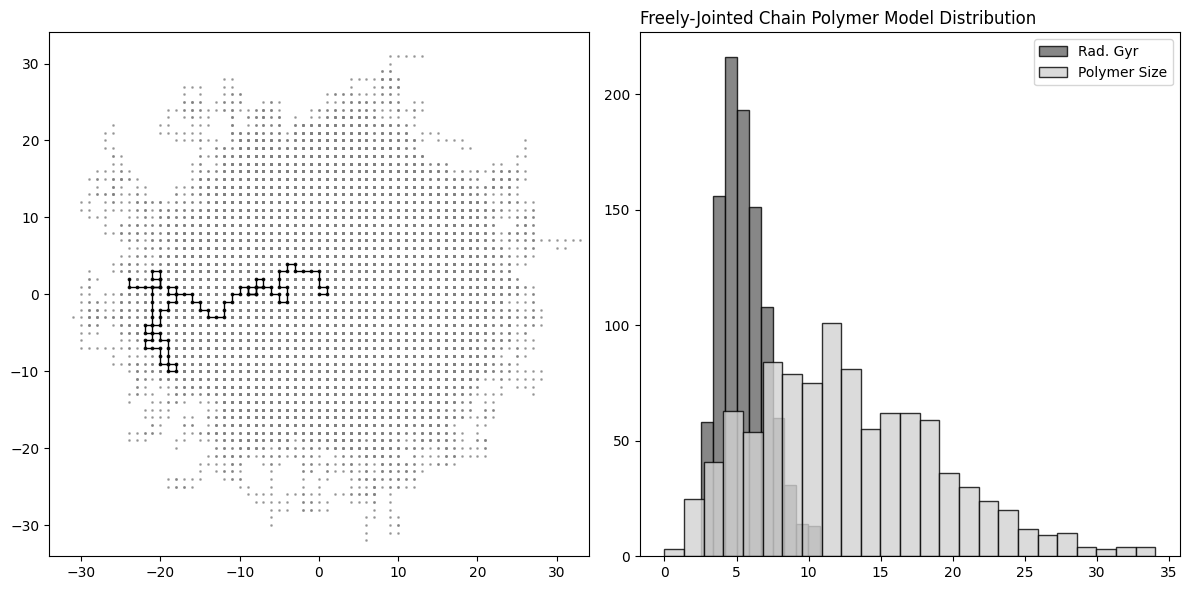

In [302]:
# Ideal Polymer Path and Distribution Plots #
r2p=np.array(r2p)
r2g=np.array(r2g)

#print(f"Naive mean: {np.mean(r2p):.3f}")
print(f"R2P nu: {np.log10(np.mean(r2p)):.3f}")
print(f"R2G nu: {np.log10(np.mean(r2g)):.3f}")
if d==2:
    # Plot lattice walk
    fig, (ax, ax2) = plt.subplots(1,2, figsize=(12,6))
    plt.title("Freely-Jointed Chain Polymer Model Distribution", fontsize=12, loc='left')
    n = np.arange(0,n_polymers)
    # Plot all walks
    for _, poly in enumerate(polymers):
        #ax.plot(poly[:,0],poly[:,1], linewidth=1, color='black', alpha=0.01)
        ax.scatter(poly[:,0], poly[:,1], color='gray', s=1, alpha=0.6)
        #ax.scatter(cm[_][0], cm[_][1], color='black', s=2, marker="x", alpha=1)
    ax2.hist(r2g, alpha=0.8, facecolor="dimgray", edgecolor="black", label="Rad. Gyr")
    ax2.hist(r2p, alpha=0.8, bins=25, facecolor="lightgray", edgecolor="black", label="Polymer Size")
    ax2.legend()
    # Plot last walk + legend
    ax.plot(plot_p[:,0], plot_p[:,1], linewidth=1, color='black', alpha=1)
    ax.scatter(plot_p[:,0], plot_p[:,1], color='black', s=3, alpha=0.8)

    # sqrt(n) box
    r = plt.Rectangle([-10,-10], 20, 20, edgecolor="black", fill=False, label="sqrt(n)")
    #ax.add_patch(r)
    lims=np.max(r2p)
    ax.set_xlim(-lims,lims)
    ax.set_ylim(-lims,lims)

    plt.grid(which="minor",alpha=0.2)
    #ax2.text(30,200,f"R2P nu: {np.log10(np.mean(r2p))*0.5:.3f}")
    #ax2.text(30,180,f"R2G nu: {np.log10(np.mean(r2g))*0.5:.3f}")
    plt.grid(which="minor",alpha=0.2)
    plt.tight_layout()
    
    plt.show()

    
elif d==3:
    # Plot lattice walk 3D case
    fig= plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)
    n = np.arange(0,n_polymers)
    # Plot all walks
    for _, poly in enumerate(polymers):
        ax.plot3D(poly[:,0], poly[:,1], poly[:,2], linewidth=1, color='black', alpha=0.04)
        #ax.scatter(poly[:,0], poly[:,1], poly[:,2], color='gray', s=1, alpha=0.1)
        #ax.scatter(cm[_][0], cm[_][1], cm[_][2], color='black', s=2, marker="x", alpha=1)
    ax2.hist(r2g, alpha=0.8, bins=25,facecolor="dimgray", edgecolor="black", label="Rad. Gyr")
    ax2.hist(r2p, alpha=0.8, bins=25, facecolor="lightgray", edgecolor="black", label="Polymer Size")
    ax2.legend()
    # Plot last walk + legend
    ax.plot3D(plot_p[:,0], plot_p[:,1], plot_p[:,2], linewidth=1, color='black', alpha=1)
    ax.scatter(plot_p[:,0], plot_p[:,1], color='black', s=3, alpha=0.8)
    lims=np.max([np.max(np.abs(plot_p[:,0])), np.max(np.abs(plot_p[:,1])), np.max(np.abs(plot_p[:,2]))])
    ax.set_xlim(-lims,lims)
    ax.set_ylim(-lims,lims)
    ax.set_zlim(-lims,lims)
    #ax2.text(30,200,f"R2P nu: {np.log10(np.mean(r2p))*0.5:.3f}")
    #ax2.text(30,180,f"R2G nu: {np.log10(np.mean(r2g))*0.5:.3f}")
    plt.grid(which="minor",alpha=0.2)
    plt.tight_layout()
    plt.title("Freely-Jointed Chain Polymer Model Distribution", fontsize=12, loc='center')
    plt.show()

(101, 1000)


/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/peterclark/opt/anaconda3/envs/main/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nu(rad)=0.5518
nu(radgyr)=0.4485


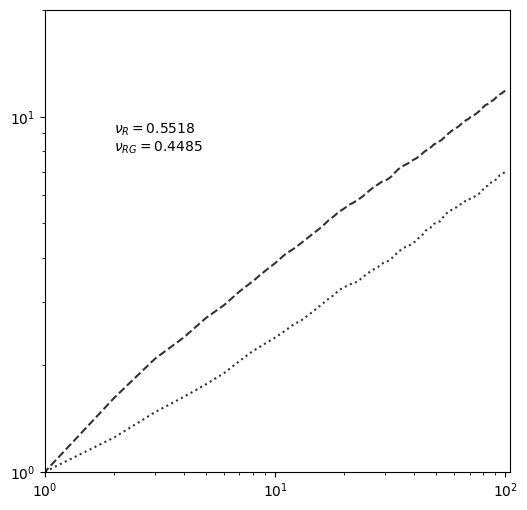

In [6]:
# 2D log plot for free-joint chain nu exponent
fig, (ax) = plt.subplots(1,1, figsize=(6,6))
rad_per_n=np.zeros(shape=(101, 1000))
radgyr_per_n=np.zeros(shape=(101, 1000))
print(rad_per_n.shape)
for i_p, p in enumerate(polymers):
    
    polymer_r=[]
    polymer_rg=[]
    for i_m, m in enumerate(p): # monomer
        cm = [np.mean(p[:i_m,0]),np.mean(p[:i_m,1])]
        radius = np.sqrt((p[i_m,0])**2 + (p[i_m,1])**2)
        r_cm = np.sqrt( np.sum((( p[i_m,0]-cm[0] )**2 + ( p[i_m,1]-cm[1] )**2)))
        polymer_r.append(radius)
        polymer_rg.append(r_cm)
        #ax.scatter(i_m, radius, marker='x', color='gray',s=1)
        #ax2.scatter(i_m, r_cm, marker='x', color='gray',s=1)

        rad_per_n[i_m,i_p]+=polymer_r[i_m]
        radgyr_per_n[i_m,i_p]+=polymer_rg[i_m]
    #ax.loglog(np.arange(len(p)), rad_per_n[:,i_p]/len(p), color='black', alpha=0.01)
    #ax2.plot(np.arange(len(p)), rad_per_n[:,i_p]/len(p), color='black', alpha=0.01)
ax.loglog(np.arange(len(p)), np.mean(rad_per_n, axis=1), color='black', alpha=0.8, linestyle='--')
ax.loglog(np.arange(len(p)), np.mean(radgyr_per_n, axis=1), color='black', alpha=0.8, linestyle=':')
#ax2.loglog(np.arange(len(p)), np.mean(radgyr_per_n, axis=1), color='black', alpha=1)
y=np.log1p((np.mean(rad_per_n, axis=1))[-1])
x=np.log1p(len(p))
ygr=np.log1p((np.mean(radgyr_per_n, axis=1))[-1])
xgr=np.log1p(len(p))

nu_rad = y/x
nu_radgyr = ygr/xgr
print(f"nu(rad)={nu_rad:.4f}")
print(f"nu(radgyr)={ ygr/xgr :.4f}")

ax.set_xlim(1,105)
ax.set_ylim(1,20)
#ax2.set_ylim(0,20)
ax.text(s=rf'$\nu_{{R}} ={nu_rad:.4f}$', x=2, y=9)
ax.text(s=rf'$\nu_{{RG}}={nu_radgyr:.4f}$', x=2, y=8)
plt.show()

--------------------------------

## Self-Avoiding Walk - Excluded Volume Polymer ##


In [148]:
import time
from scipy.stats import linregress
NEIGHBORS_2D = [(1, 0), (-1, 0), (0, 1), (0, -1)]
NEIGHBORS_3D = [(-1, 0, 0), (0, 1, 0), (0, 0, -1), (1, 0, 0), (0, -1, 0), (0, 0, 1)]

def add2D(cur, dir):
    return (cur[0] + dir[0], cur[1] + dir[1])

def add3D(cur, dir):
    return (cur[0] + dir[0], cur[1] + dir[1], cur[2] + dir[2])


def selfAvoidingWalk(n, dim,start=(0,0), max_restarts=10000):
    for attempt in range(max_restarts):
        path = [start]
        visited = {start}
        weights=[]
        trapped = False
        while len(path) < n + 1:
            cur = path[-1]
            # Probe neighbors
            if dim==3:
                free = [add3D(cur, d) for d in NEIGHBORS_3D if add3D(cur, d) not in visited]
            elif dim==2:
                free = [add2D(cur, d) for d in NEIGHBORS_2D if add2D(cur, d) not in visited]
            if not free:
                trapped = True
                break
            weights.append(len(free)) # number of unoccupied spaces at that position
            next_pos = free[np.random.choice(len(free))]
            path.append(next_pos)
            visited.add(next_pos)
        if not trapped:
            return path, weights
    # max attempts reached
    return None

def randomWalk(n, dim, start=(0, 0), max_restarts=10000):
    path = [start]
    
    if dim == 2:
        neighbors = NEIGHBORS_2D
        add = add2D
    elif dim == 3:
        neighbors = NEIGHBORS_3D
        add = add3D
    else:
        raise ValueError("dim must be 2 or 3")
    
    for _ in range(n):
        d = neighbors[np.random.choice(len(neighbors))]
        path.append(add(path[-1], d))
    
    weights = [1] * n  # all steps weight 1
    return path, weights

def permSelfAvoidingWalk(
    n,
    dim,
    start=(0, 0),
    max_restarts=10000,
    C_minus=0.3,
    C_plus=3.0,
):
    # running estimates of ⟨W_n⟩
    W_avg = np.ones(n + 1)

    for attempt in range(max_restarts):
        path = [start]
        visited = {start}
        weights = []
        W = 1.0  # Rosenbluth weight

        step = 0
        while step < n:
            cur = path[-1]

            if dim == 2:
                free = [add2D(cur, d) for d in NEIGHBORS_2D
                        if add2D(cur, d) not in visited]
            elif dim == 3:
                free = [add3D(cur, d) for d in NEIGHBORS_3D
                        if add3D(cur, d) not in visited]
            else:
                raise ValueError("dim must be 2 or 3")

            if not free:
                break  # dead end → restart

            k = len(free)
            weights.append(k)
            W *= k

            # update running mean
            step += 1
            W_avg[step] = 0.9 * W_avg[step] + 0.1 * W

            # PERM thresholds
            W_minus = C_minus * W_avg[step]
            W_plus = C_plus * W_avg[step]

            # pruning
            if W < W_minus:
                if np.random.rand() < 0.5:
                    break  # kill chain
                else:
                    W *= 2  # survive, compensate

            # enrichment
            if W > W_plus:
                W /= 2  # clone implicitly

            next_pos = free[np.random.choice(k)]
            path.append(next_pos)
            visited.add(next_pos)

        if len(path) == n + 1:
            return path, weights

    return None

def permSelfAvoidingWalkCloning(
    n,
    dim,
    start=(0, 0),
    max_restarts=10000,
    C_minus=0.5,
    C_plus=2.0,
):
    """
    Full PERM with explicit cloning for SAW in 2D or 3D.
    Returns: (path, weights)
    """
    W_avg = np.ones(n + 1)  # running average of stepwise Rosenbluth weights

    for attempt in range(max_restarts):
        paths_stack = [[start]]  # stack of growing chains
        visited_stack = [{start}]
        weights_stack = [[]]
        W_stack = [1.0]  # cumulative Rosenbluth weight

        while paths_stack:
            path = paths_stack.pop()
            visited = visited_stack.pop()
            weights = weights_stack.pop()
            W = W_stack.pop()
            step = len(path) - 1

            # finished?
            if step == n:
                return path, weights

            cur = path[-1]

            # available neighbors
            if dim == 2:
                free = [add2D(cur, d) for d in NEIGHBORS_2D if add2D(cur, d) not in visited]
            elif dim == 3:
                free = [add3D(cur, d) for d in NEIGHBORS_3D if add3D(cur, d) not in visited]
            else:
                raise ValueError("dim must be 2 or 3")

            k = len(free)

            if k == 0:
                continue  # dead end, discard chain

            # update weight
            weights_new = weights + [k]
            W_new = W * k

            # update running average
            step_new = step + 1
            W_avg[step_new] = 0.9 * W_avg[step_new] + 0.1 * W_new

            # PERM thresholds
            W_minus = C_minus * W_avg[step_new]
            W_plus = C_plus * W_avg[step_new]

            # pruning
            if W_new < W_minus:
                if np.random.rand() < 0.5:
                    continue  # discard chain
                else:
                    W_new *= 2  # survive, compensate

            # enrichment / cloning
            num_clones = max(1, int(round(W_new / W_plus))) if W_new > W_plus else 1

            # grow clones
            for _ in range(num_clones):
                next_pos = free[np.random.choice(k)]
                path_clone = path + [next_pos]
                visited_clone = visited | {next_pos}
                weights_stack.append(weights_new)
                paths_stack.append(path_clone)
                visited_stack.append(visited_clone)
                W_stack.append(W_new / num_clones)  # divide weight among clones


In [13]:

def R2P(path):
    # Polymer Size (end-end)
    x0 = np.array(path[0])
    xN = np.array(path[-1])
    return np.sum((xN - x0)**2)

def R2G(path):
    # radius of gyration squared
    coords = np.array(path)             # shape (N+1, dim)
    r_cm = np.mean(coords, axis=0)      # center of mass
    return np.mean(np.sum((coords - r_cm)**2, axis=1))


In [109]:
def plotSinglePolymer(path):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    coordinates=np.array(path)
    if dim==2:
        ax.plot(coordinates[:,0],coordinates[:,1], linewidth=1, color='black', alpha=0.4,label="saw-polymer")
        ax.scatter(coordinates[:,0], coordinates[:,1], color='black', s=2, alpha=0.8)
    elif dim==3:
        ax.plot3D(coordinates[:,0],coordinates[:,1],coordinates[:,2], linewidth=1, color='black', alpha=0.4,label="saw-polymer")
        ax.scatter3D(coordinates[:,0], coordinates[:,1], coordinates[:,2], color='black', s=2, alpha=0.8)

    ax.legend()
    plt.grid(which="minor",alpha=0.2)
    plt.tight_layout()
    plt.show()


def plotMultiplePolymer(paths, dim):
    # plot all paths with less alpha, shows distribution
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d') if dim==3 else fig.add_subplot(1, 1, 1)
    for _,path in enumerate(paths):
        coordinates=np.array(path)
        if _%10==0:
            if dim==2:
                ax.plot(coordinates[:,0],coordinates[:,1], linewidth=1, color='black', alpha=0.05)
                #ax.scatter(coordinates[:,0], coordinates[:,1], color='black', s=2, alpha=0.8)
            elif dim==3:
                ax.plot3D(coordinates[:,0],coordinates[:,1],coordinates[:,2], linewidth=1, color='black', alpha=0.05)
                #ax.scatter3D(coordinates[:,0], coordinates[:,1], coordinates[:,2], color='black', s=2, alpha=0.8)
    if dim==2:
        ax.plot(coordinates[:,0],coordinates[:,1], linewidth=1, color='black', alpha=0.4,label="saw-polymer")
        ax.scatter(coordinates[:,0], coordinates[:,1], color='black', s=2, alpha=0.8)
    elif dim==3:
        ax.plot3D(coordinates[:,0],coordinates[:,1],coordinates[:,2], linewidth=1, color='black', alpha=0.4,label="saw-polymer")
        ax.scatter3D(coordinates[:,0], coordinates[:,1], coordinates[:,2], color='black', s=2, alpha=0.8)
    ax.legend()
    plt.grid(which="minor",alpha=0.2)
    plt.tight_layout()
    plt.show()

def plotRadiusDistribution(r2p, r2g, method_name=""):
    fig, ax = plt.subplots(figsize=(6,6))

    ax.hist(r2p, bins=30, density=True,
            facecolor="lightgray", edgecolor="black",
            alpha=0.8, label=r"$R_p^2$")

    ax.hist(r2g, bins=30, density=True,
            facecolor="dimgray", edgecolor="black",
            alpha=0.8, label=r"$R_g^2$")

    ax.set_xlabel(r"$R^2$")
    ax.set_ylabel("probability density")
    ax.legend()
    ax.grid(alpha=0.2)

    ax.set_title(f"Final-length radius distributions {method_name}")
    plt.tight_layout()
    plt.show()

def loglog_slope(N, R, Nmin):
    valid = (
        (N >= Nmin) &
        np.isfinite(R) &
        (R > 0)
    )
    if np.sum(valid) < 5:
        return np.nan
    return np.polyfit(np.log(N[valid]), np.log(R[valid]), 1)[0]


def plotRadiusVersusN(paths, weights, log=True):
    # compute observables
    R2P = np.stack([R2P_n(p) for p in paths])  # (walks, n+1)
    R2G = np.stack([R2G_n(p) for p in paths])

    # Rosenbluth weights
    W = np.array([np.cumprod(w) for w in weights])  # (walks, n)

    # stepwise weighted averages
    den = np.sum(W, axis=0)

    R2P_w = np.full_like(den, np.nan, dtype=float)
    R2G_w = np.full_like(den, np.nan, dtype=float)

    valid = den > 0

    R2P_w[valid] = (
        np.sum(W[:, valid] * R2P[:, 1:][:, valid], axis=0) / den[valid]
    )

    R2G_w[valid] = (
        np.sum(W[:, valid] * R2G[:, 1:][:, valid], axis=0) / den[valid]
    )

    #R2P_w = np.sum(W * R2P[:, 1:], axis=0) / np.sum(W, axis=0)
    #R2G_w = np.sum(W * R2G[:, 1:], axis=0) / np.sum(W, axis=0)

    i = np.arange(1, len(R2P_w) + 1)

    fig, ax = plt.subplots(figsize=(6,6))
    Nmin=20
    '''
    if log:
        # unweighted individual walks
        for p in range(0, len(paths), 10):
            ax.scatter(i, R2P[p, 1:], color="black", alpha=0.01, marker="x", s=0.5)
            ax.scatter(i, R2G[p, 1:], color="black", alpha=0.01, marker=".", s=0.5)

        # ensemble means
        #ax.loglog(i, np.mean(R2P[:, 1:], axis=0), "--", color="black", label=r"$\langle R_p^2\rangle$")
        #ax.loglog(i, np.mean(R2G[:, 1:], axis=0), "-",  color="black", label=r"$\langle R_g^2\rangle$")

        # Rosenbluth-weighted
        #ax.loglog(i, R2P_w, ":", color="black", label="Rosenbluth $R_p^2$")
        #ax.loglog(i, R2G_w, ".--", color="black", label="Rosenbluth $R_g^2$")

        # effective sample size
        Neff = np.sum(W > 0, axis=0)

        # require at least this many contributing walks
        Neff_min = 50
        stat_ok = Neff >= Neff_min

        i_ok = i[stat_ok]
        R2P_mean = np.mean(R2P[:, 1:], axis=0)[stat_ok]
        R2G_mean = np.mean(R2G[:, 1:], axis=0)[stat_ok]
        R2P_w_ok = R2P_w[stat_ok]
        R2G_w_ok = R2G_w[stat_ok]
        ax.loglog(i_ok, R2P_mean, "--", color="black",
                label=r"$\langle R_p^2\rangle$")
        ax.loglog(i_ok, R2G_mean, "-", color="black",
                label=r"$\langle R_g^2\rangle$")

        ax.loglog(i_ok, R2P_w_ok, ":", color="black",
                label="Rosenbluth $R_p^2$")
        ax.loglog(i_ok, R2G_w_ok, ".-", color="black",
                label="Rosenbluth $R_g^2$")



        # scaling fit
        Nmin = 20
        mask = i >= Nmin
        slope_r2p = loglog_slope(i, np.mean(R2P[:, 1:], axis=0), Nmin)
        slope_r2g = loglog_slope(i, np.mean(R2G[:, 1:], axis=0), Nmin)
        
        #slope_r2p_w = loglog_slope(i, R2P_w, Nmin)
        #slope_r2g_w = loglog_slope(i, R2G_w, Nmin)

        ax.text(3, 0.6*np.max(R2P_w),
            rf"$\nu_p={0.5*slope_r2p:.3f}$" "\n"
            rf"$\nu_g={0.5*slope_r2g:.3f}$" "\n\n")
            #rf"$\nu_p^{{rw}}={0.5*slope_r2p_w:.3f}$" "\n"
            #rf"$\nu_g^{{rw}}={0.5*slope_r2g_w:.3f}$")


    else:
        for p in range(len(paths)):
            ax.plot(R2P[p], alpha=0.1, color="black", linestyle="--")
            ax.plot(R2G[p], alpha=0.1, color="black")

        ax.plot(np.mean(R2P, axis=0), "--", color="black")
        ax.plot(np.mean(R2G, axis=0), "-", color="black")
    '''
    # effective number of surviving chains
    # additional numerical safety
    finite = (
        np.isfinite(R2P_w) &
        np.isfinite(R2G_w) &
        (R2P_w > 0) &
        (R2G_w > 0)
    )

    # effective sample size (ESS proxy)
    Neff = np.sum(W > 0, axis=0)

    # require decent statistics
    Neff_min = 20

    fit_mask = (
        (i >= Nmin) &
        finite &
        (Neff >= Neff_min)
    )

    valid = Neff >= Neff_min

    # x-axis (monomer index)
    i = np.arange(1, len(R2P_w) + 1)

    fig, ax = plt.subplots(figsize=(6, 6))

    # --- scatter surviving unweighted walks ---
    for p in range(len(paths)):
        alive = W[p] > 0
        ax.scatter(i[alive], R2P[p, 1:][alive],
                color="black", alpha=0.01, s=2)

    # --- scatter Rosenbluth-weighted ensemble (only where alive) ---
    ax.scatter(i[valid], R2P_w[valid],
            color="black", s=25, marker="o",
            label=r"Rosenbluth $\langle R_p^2\rangle$")

    ax.scatter(i[valid], R2G_w[valid],
            color="black", s=25, marker="s",
            label=r"Rosenbluth $\langle R_g^2\rangle$")

    # --- scaling fit ONLY on valid region ---
    Nmin = 20
    fit_mask = (i >= Nmin) & valid

    res_p = linregress(
        np.log(i[fit_mask]),
        np.log(R2P_w[fit_mask])
    )

    res_g = linregress(
        np.log(i[fit_mask]),
        np.log(R2G_w[fit_mask])
    )

    nu_p = 0.5 * res_p.slope
    nu_g = 0.5 * res_g.slope

    ax.text(2, 0.7 * np.nanmax(R2P_w),
            rf"$\nu_p = {nu_p:.3f}$" "\n"
            rf"$\nu_g = {nu_g:.3f}$")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(1, 100)
    ax.set_xlabel("polymer length $n$")
    ax.grid(alpha=0.2)
    ax.legend()
    plt.tight_layout()
    plt.show()

    ax.set_xlabel("length $n$")
    ax.grid(which="minor", alpha=0.2)
    ax.legend()
    plt.tight_layout()
    plt.show()

def plotWeightHistogram(weights, log=True):
    """
    weights: list of per-step coordination numbers (len = n)
    """
    W = np.array([np.prod(w) for w in weights])

    fig, ax = plt.subplots(figsize=(7, 5))

    if log:
        ax.hist(np.log1p(W), bins=40, color="lightgray", edgecolor="black")
        ax.set_xlabel(r"$\log_{10} W_N$")
    else:
        ax.hist(W, bins=40, color="lightgray", edgecolor="black")
        ax.set_xlabel(r"$W_N$")

    ess = (np.sum(W) ** 2) / np.sum(W ** 2)

    ax.set_title("Rosenbluth weight distribution")
    ax.text(
        0.05, 0.95,
        f"ESS ≈ {ess:.1f} / {len(W)}",
        transform=ax.transAxes,
        va="top"
    )

    ax.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

def plotNuVsN(paths, weights, Nmin=10):
    from scipy.stats import linregress

    R2P = np.stack([R2P_n(p) for p in paths])
    W = np.array([np.cumprod(w) for w in weights])

    i = np.arange(1, R2P.shape[1])
    R2P_w = np.sum(W * R2P[:, 1:], axis=0) / np.sum(W, axis=0)

    nus = []
    Ns = []
    for N in range(Nmin + 5, len(i)):
        Nslice = i[Nmin:N+1]
        Rslice = R2P_w[Nmin:N+1]

        valid = (Rslice > 0) & np.isfinite(Rslice)
        if np.sum(valid) < 5:
            continue

        slope, _, _, _, _ = linregress(np.log(Nslice[valid]),
                                    np.log(Rslice[valid]))
        nus.append(0.5 * slope)
        Ns.append(i[N])


    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(Ns, nus, marker="o", color="black", linewidth=1)
    ax.axhline(0.75, color="red", linestyle="--", label="Exact 2D SAW ν = 0.75")
    ax.set_xlabel("polymer length N")
    ax.set_ylabel(r"$\nu(N)$")
    ax.set_title("Effective exponent vs polymer length")
    ax.legend()
    ax.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()




def R2P_n(path):
    coords = np.array(path)
    start = coords[0]
    diff = coords - start
    r2p = np.sum(diff**2, axis=1)
    return r2p 
def R2G_n(path):
    coords = np.array(path)
    N = coords.shape[0]
    r2g = np.zeros(N)

    for i in range(N):
        prefix = coords[:i+1]
        r_cm = np.mean(prefix, axis=0)
        r2g[i] = np.mean(np.sum((prefix - r_cm)**2, axis=1))

    return r2g 

In [268]:
def chain_observables(path):
    """
    path: array (k, dim)
    returns:
        R2_n : array length k
        Rg2_n: array length k
    """
    path = np.asarray(path)
    k, dim = path.shape

    R2_n = np.zeros(k)
    Rg2_n = np.zeros(k)

    for n in range(1, k + 1):
        r = path[:n]

        # R^2 from origin
        R2_n[n-1] = np.sum(r[-1]**2)

        # radius of gyration
        r_cm = r.mean(axis=0)
        Rg2_n[n-1] = np.mean(np.sum((r - r_cm)**2, axis=1))

    return R2_n, Rg2_n

def collect_statistics(paths, weights, n_max):
    """
    paths   : list of arrays of shape (k_i, dim)
    weights : list of arrays of length (k_i-1)
    n_max   : maximum chain length
    """

    R2_sum   = np.zeros(n_max)
    Rg2_sum  = np.zeros(n_max)
    R2w_sum  = np.zeros(n_max)
    Rg2w_sum = np.zeros(n_max)

    W_sum    = np.zeros(n_max)
    Neff     = np.zeros(n_max, dtype=int)

    for path, w in zip(paths, weights):
        R2_n, Rg2_n = chain_observables(path)
        W_n = np.cumprod(w)

        k = min(len(R2_n), n_max)

        for n in range(k):
            if W_n[n] <= 0:
                continue

            R2_sum[n]  += R2_n[n]
            Rg2_sum[n] += Rg2_n[n]

            R2w_sum[n]  += W_n[n] * R2_n[n]
            Rg2w_sum[n] += W_n[n] * Rg2_n[n]

            W_sum[n] += W_n[n]
            Neff[n]  += 1

    stats = {
        "n": np.arange(1, n_max+1),
        "R2":  np.where(Neff>0, R2_sum/Neff, np.nan),
        "Rg2": np.where(Neff>0, Rg2_sum/Neff, np.nan),
        "R2_w":  np.where(W_sum>0, R2w_sum/W_sum, np.nan),
        "Rg2_w": np.where(W_sum>0, Rg2w_sum/W_sum, np.nan),
        "Neff": Neff
    }

    return stats

import matplotlib.lines as mlines
def extract_nu(n, R2):
    """
    Computes effective Flory exponent nu from R^2 vs N
    using log-log slope.
    """
    valid = np.isfinite(R2) & (R2 > 0)
    if np.sum(valid) < 5:
        return np.nan

    logN = np.log(n[valid])
    logR = np.log(R2[valid])

    slope, _, _, _, _ = linregress(logN, logR)
    nu = 0.5 * slope
    return nu

def plot_radii(stats, name, dim, Neff_min=20):
    linewidth = 0.8
    markersize = 3
    m1=rf'$\times$'
    m2=rf'$\odot$'
    n = stats["n"]

    mask = stats["Neff"] >= Neff_min
    name = 'freeJointChain' if name=="randomWalk" else name
    plt.figure(figsize=(6,6))


    alphas = np.linspace(0.5, 0.01, len(n[mask]))
    # -----------------------
    # unweighted
    # -----------------------
    step = 2  # plot every 5th point to reduce clutter
    for xi, yi, a in zip(n[mask][::step], stats["R2"][mask][::step], alphas[::step]):
        plt.loglog(xi, yi, marker=m1, color='black', markersize=markersize,
                linestyle="None", alpha=a)
    for xi, yi, a in zip(n[mask][::step], stats["Rg2"][mask][::step], alphas[::step]):
        plt.loglog(xi, yi, marker=m1, color='black', markersize=markersize,
                linestyle="None", alpha=a)

    # -----------------------
    # weighted (if present)
    # -----------------------
    weighted_present = (name != 'freeJointChain') and np.any(np.isfinite(stats["R2_w"]) & (stats["R2_w"] > 0))
    if weighted_present:
        for xi, yi, a in zip(n[mask][::step], stats["R2_w"][mask][::step], alphas[::step]):
            plt.loglog(xi, yi, marker=m2, color='black', markersize=markersize,
                    linestyle="None", alpha=a)
        for xi, yi, a in zip(n[mask][::step], stats["Rg2_w"][mask][::step], alphas[::step]):
            plt.loglog(xi, yi, marker=m2, color='black', markersize=markersize,
                    linestyle="None", alpha=a)

    # Optional: plot connecting lines for the mean
    plt.loglog(n[mask], stats["R2"][mask], linewidth=linewidth, color='black', 
               linestyle="dashed", alpha=0.6, label=r"$\langle R_p^2\rangle$")
    plt.loglog(n[mask], stats["Rg2"][mask], linewidth=linewidth, color='black', 
               linestyle="dotted", alpha=0.6, label=r"$\langle R_g^2\rangle$")
    if weighted_present:
        plt.loglog(n[mask], stats["R2_w"][mask], linewidth=linewidth, color='black', 
                   linestyle="dashed", alpha=0.6, label=r"$\langle R_p^2\rangle_w$")
        plt.loglog(n[mask], stats["Rg2_w"][mask], linewidth=linewidth, color='black', 
                   linestyle="dotted", alpha=0.6, label=r"$\langle R_g^2\rangle_w$")


    # Compute ν
    nu_R2 = extract_nu(n[mask], stats["R2"][mask])
    nu_Rg2 = extract_nu(n[mask], stats["Rg2"][mask])
    nu_R2w = extract_nu(n[mask], stats["R2_w"][mask]) if weighted_present else np.nan
    nu_Rgw = extract_nu(n[mask], stats["Rg2_w"][mask]) if weighted_present else np.nan

    # Print ν on plot
    #ypos = 0.6 * np.nanmax([stats["R2"][mask], stats["R2_w"][mask] if weighted_present else 0])
    if not weighted_present:
        plt.text(
        6, 200,
        rf'$Scaling\ exponent:\ \nu$' "\n"+
        rf"$R_p^2 : {nu_R2:.3f}$" "\n" +
        rf"$R_g^2 : {nu_Rg2:.3f}$" "\n",
        fontsize=9
    ) 
    else:
        plt.text(
            6, 200,
            rf'$Scaling\ exponent:\ \nu$' "\n"+
            rf"$R_p^2 : {nu_R2:.3f}\ [{nu_R2w:.3f}_{{w}}]$" "\n" +
            rf"$R_g^2 : {nu_Rg2:.3f}\ [{nu_Rgw:.3f}_{{w}}]$" "\n",
            fontsize=9
        )



    window = 5
    nu_R2 = np.full_like(n, np.nan, dtype=float)
    nu_Rg2 = np.full_like(n, np.nan, dtype=float)
    for i in range(window, len(n)):
        R2_slice = stats["R2"][i-window:i]
        Rg2_slice = stats["Rg2"][i-window:i]
        
        # skip if any zero or invalid values
        if np.any(R2_slice <= 0) or np.any(~np.isfinite(R2_slice)):
            continue
        if np.any(Rg2_slice <= 0) or np.any(~np.isfinite(Rg2_slice)):
            continue

        if "Neff" in stats and np.any(stats["Neff"][i-window:i] < 10):
            continue
        
        nu_R2[i] = extract_nu(n[i-window:i], R2_slice)
        nu_Rg2[i] = extract_nu(n[i-window:i], Rg2_slice)

    mask_nu = ~np.isnan(nu_R2) & (nu_R2>0.15)
    mask_nu2 = ~np.isnan(nu_Rg2) & (nu_Rg2>0.15)

    # plot effective exponent on the same x-axis
    plt.plot(n[mask_nu], nu_R2[mask_nu], color='black', linestyle=(0,(5,1)), linewidth=0.6, alpha=0.7, label=r"$eff\ \nu_{R^2}(n)$")
    plt.plot(n[mask_nu2], nu_Rg2[mask_nu2], color='black', linestyle=(0,(1,1)), linewidth=0.6, alpha=0.7, label=r"$eff\ \nu_{R_g^2}(n)$")


    nu_R2_asymp = np.nanmean(nu_R2[mask_nu][-10:])
    nu_Rg2_asymp = np.nanmean(nu_Rg2[mask_nu2][-10:])
    textstr = (
        rf"$eff\ \nu_{{R^2}}={nu_R2_asymp:.3f}$" "\n"
        rf"$eff\ \nu_{{R_g^2}}={nu_Rg2_asymp:.3f}$"
    )
    if weighted_present:
        nu_R2w_asymp = extract_nu(n[mask_nu], stats["R2_w"][mask_nu])
        nu_Rgw_asymp = extract_nu(n[mask_nu2], stats["Rg2_w"][mask_nu2])

        textstr = (
            rf"$eff.\ \nu_{{R^2}}={nu_R2_asymp:.3f}\ [{nu_R2w_asymp:.3f}_w]$" "\n"
            rf"$eff.\ \nu_{{R_g^2}}={nu_Rg2_asymp:.3f}\ [{nu_Rgw_asymp:.3f}_w]$"
            )

    plt.text(6 ,0.15, textstr, fontsize=8, color='black')
    


    plt.xlim(left=2, right=100)
    plt.ylim(bottom=0.1, top=1000)
    plt.xlabel("number of monomers $n$")
    plt.ylabel(rf"$\langle R^2 \rangle$")
    markersize=5
    handles = [
        mlines.Line2D([], [], color='black', marker=m1, linestyle="dashed", markersize=markersize, label=r"$\langle R_p^2\rangle$"),
        mlines.Line2D([], [], color='black', marker=m1, linestyle="dotted", markersize=markersize, label=r"$\langle R_g^2\rangle$"),
    ]

    if weighted_present:
        handles += [
            mlines.Line2D([], [], color='black', marker=m2, linestyle="dashed", markersize=markersize, label=r"$\langle R_p^2\rangle_w$"),
            mlines.Line2D([], [], color='black', marker=m2, linestyle="dotted", markersize=markersize, label=r"$\langle R_g^2\rangle_w$"),
        ]
    handles+=[
        mlines.Line2D([],[], color='black', linestyle=(0,(5,1)),label=r"$eff\ \nu_{R_p^2}(n)$"),
        mlines.Line2D([],[], color='black', linestyle=(0,(1,1)),label=r"$eff\ \nu_{R_g^2}(n)$")
    ]
    right_axis = plt.gca().secondary_yaxis('right')
    right_axis.set_yticklabels(["0","0","1","2","3","4"])
    right_axis.set_ylabel(r"effective $\nu(n)$") 
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.legend(handles=handles,loc='upper left', fontsize=9)
    plt.title(label=name+f" (d={dim} n=100, N=1000)", fontsize=12)
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

def generate_paths_stats(walk_func, n, m, dim=2, start=None, max_restarts=10000):
    """
    Collect polymer paths, weights, and compute mean-square statistics on-the-fly.

    Parameters
    ----------
    walk_func : function
        randomWalk, selfAvoidingRandomWalk, or permSelfAvoidingWalkCloning
    n : int
        polymer length
    m : int
        number of polymers to generate
    dim : int
        2 or 3
    start : tuple
        starting coordinates
    max_restarts : int
        max attempts for generating each polymer

    Returns
    -------
    stats : dict
        {'n', 'R2', 'Rg2', 'R2_w', 'Rg2_w', 'Neff'}
    paths : list of arrays
        coordinates of generated paths
    weights : list of arrays
        associated weights
    """
    if start is None:
        start = (0, 0, 0) if dim == 3 else (0, 0)

    paths = []
    weights = []

    while len(paths) < m:
        result = walk_func(n, dim=dim, start=start, max_restarts=max_restarts)
        if result is None:
            continue

        path, w = result
        if len(path) < 2:  # skip trivial paths
            continue

        paths.append(path)
        weights.append(w)

    # compute statistics
    stats = collect_statistics(paths, weights, n_max=n)

    return stats, paths, weights



/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_9089/4070693720.py:229: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  right_axis.set_yticklabels(["0","0","1","2","3","4"])


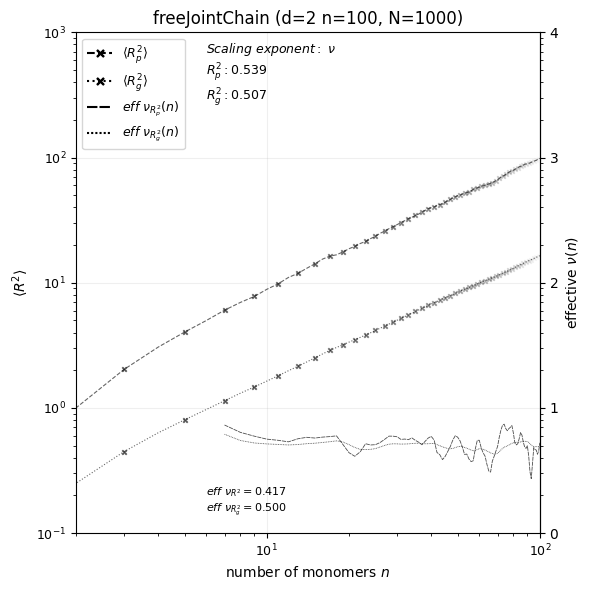

/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_9089/4070693720.py:229: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  right_axis.set_yticklabels(["0","0","1","2","3","4"])


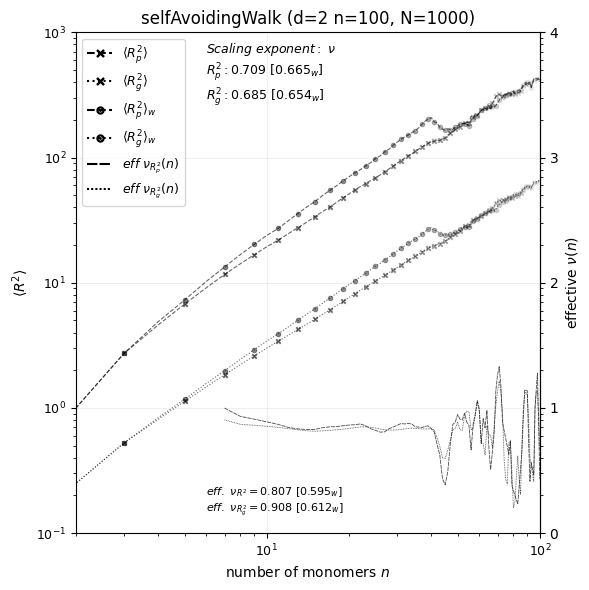

/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_9089/4070693720.py:229: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  right_axis.set_yticklabels(["0","0","1","2","3","4"])


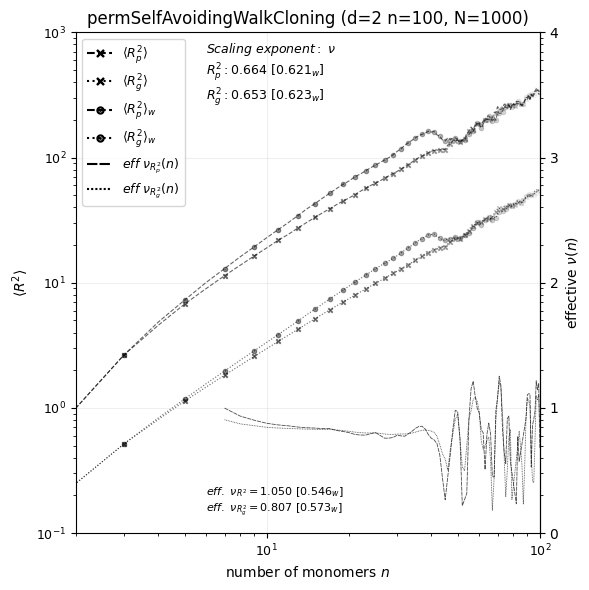

In [270]:
dim = 2
start = (0, 0, 0) if dim == 3 else (0, 0)
n = 100
m = 1000
max_restarts=50000
paths_rw, weights_rw = randomWalk(n, dim=dim, start=start, max_restarts=max_restarts)
paths_perm, weights_perm = permSelfAvoidingWalkCloning(n, dim=dim, start=start, max_restarts=max_restarts)

stats=[]
paths=[]
weights=[]
for func in [randomWalk, selfAvoidingWalk, permSelfAvoidingWalkCloning]:
    stats_model, paths_model, weights_model = generate_paths_stats(
        func,
        n=n,
        m=m,
        dim=dim,
        max_restarts=max_restarts
    )
    stats.append(stats_model)
    paths.append(paths_model)
    weights.append(weights_model)
    name_model = func.__name__
    plot_radii(stats_model, name_model, dim)



/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_9089/4070693720.py:229: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  right_axis.set_yticklabels(["0","0","1","2","3","4"])


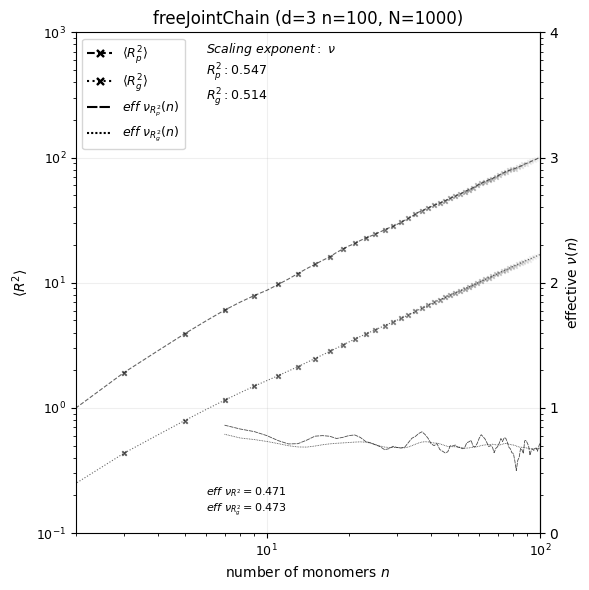

/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_9089/4070693720.py:229: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  right_axis.set_yticklabels(["0","0","1","2","3","4"])


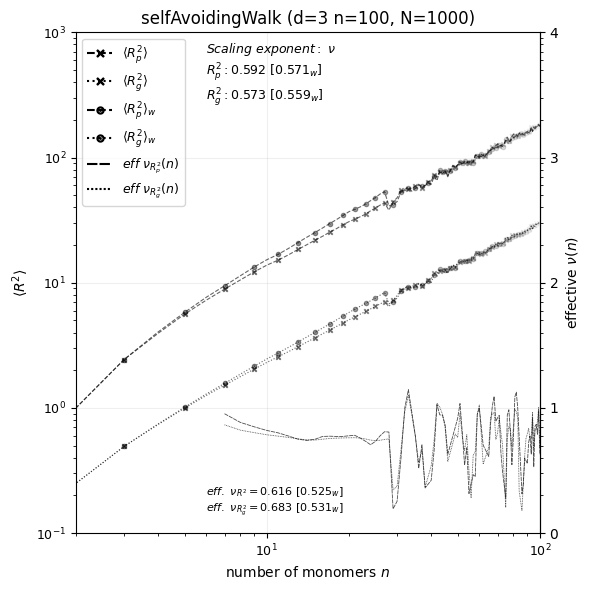

/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_9089/4070693720.py:229: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  right_axis.set_yticklabels(["0","0","1","2","3","4"])


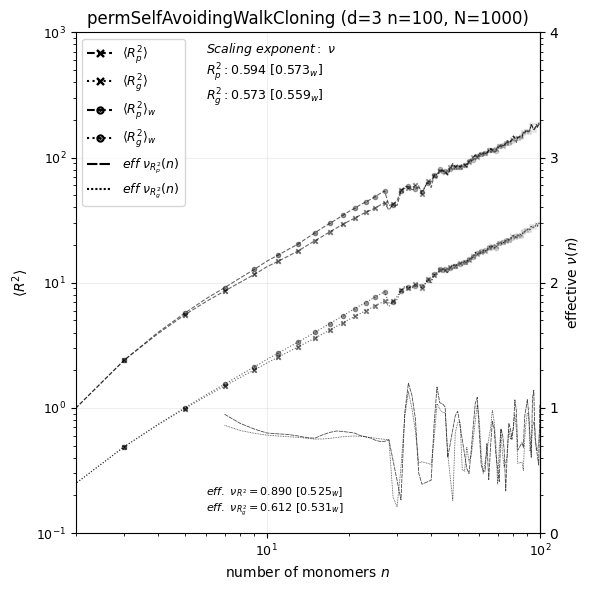

In [303]:
dim = 3
start = (0, 0, 0) if dim == 3 else (0, 0)
n = 100
m = 1000
max_restarts=50000
paths_rw, weights_rw = randomWalk(n, dim=dim, start=start, max_restarts=max_restarts)
paths_perm, weights_perm = permSelfAvoidingWalkCloning(n, dim=dim, start=start, max_restarts=max_restarts)

stats=[]
paths=[]
weights=[]
for func in [randomWalk, selfAvoidingWalk, permSelfAvoidingWalkCloning]:
    stats_model, paths_model, weights_model = generate_paths_stats(
        func,
        n=n,
        m=m,
        dim=dim,
        max_restarts=max_restarts
    )
    stats.append(stats_model)
    paths.append(paths_model)
    weights.append(weights_model)
    name_model = func.__name__
    plot_radii(stats_model, name_model, dim)



In [ ]:
def run_experiment(walk_func, label):
    paths, weights, r2p, r2g = [], [], [], []
    max_restarts=50000
    while len(paths) < m:
        result = walk_func(n, dim=dim, start=start, max_restarts=max_restarts)
        if result is None:
            continue
        path, w = result
        paths.append(path)
        weights.append(w)
        r2p.append(R2P_n(path)[-1])
        r2g.append(R2G_n(path)[-1])

    plotRadiusDistribution(r2p, r2g, label)
    plotRadiusVersusN(paths, weights)
    plotNuVsN(paths, weights)

dim = 2
start = (0, 0, 0) if dim == 3 else (0, 0)
n = 100
m = 1000

run_experiment(selfAvoidingWalk, "SAW")
run_experiment(randomWalk, "Ideal")
run_experiment(permSelfAvoidingWalkCloning, "PERM")



In [ ]:
dim = 3
start = (0, 0, 0) if dim == 3 else (0, 0)
n = 100
m = 1000

paths = []
weights = []
r2p = []
r2g = []

t0 = time.time()

while len(paths) < m:
    result = selfAvoidingWalk(n, dim=dim, start=start, max_restarts=50000)
    #result = permSelfAvoidingWalkCloning(n, dim=dim, start=start, max_restarts=25000)
    if result is None:
        continue

    path, weight = result
    paths.append(path)
    weights.append(weight)

    r2p.append(R2P_n(path)[-1])
    r2g.append(R2G_n(path)[-1])

print(f"{time.time() - t0:.3f}s")

plotMultiplePolymer(paths, dim)
plotRadiusDistribution(r2p, r2g)
plotRadiusVersusN(paths, weights)
plotWeightHistogram(weights)
plotNuVsN(paths, weights)


In [ ]:
# 2D log plot for free-joint chain nu exponent
fig, (ax) = plt.subplots(1,1, figsize=(6,6))
n = 100
m = 2500
rad_per_n=np.zeros(shape=(101, m))
radgyr_per_n=np.zeros(shape=(101, m))
print(rad_per_n.shape)
for i_p, p in enumerate(np.array(paths)):
    
    polymer_r=[]
    polymer_rg=[]
    for i_m, m in enumerate(p): # monomer
        cm = [np.mean(p[:i_m,0]),np.mean(p[:i_m,1])]
        radius = np.sqrt((p[i_m,0])**2 + (p[i_m,1])**2)
        r_cm = np.sqrt( np.sum((( p[i_m,0]-cm[0] )**2 + ( p[i_m,1]-cm[1] )**2)))
        polymer_r.append(radius)
        polymer_rg.append(r_cm)
        #ax.scatter(i_m, radius, marker='x', color='gray',s=1)
        #ax2.scatter(i_m, r_cm, marker='x', color='gray',s=1)

        rad_per_n[i_m,i_p]+=polymer_r[i_m]
        radgyr_per_n[i_m,i_p]+=polymer_rg[i_m]
    #ax.loglog(np.arange(len(p)), rad_per_n[:,i_p]/len(p), color='black', alpha=0.01)
    #ax2.plot(np.arange(len(p)), rad_per_n[:,i_p]/len(p), color='black', alpha=0.01)
ax.loglog(np.arange(len(p)), np.mean(rad_per_n, axis=1), color='black', alpha=0.8, linestyle='--')
ax.loglog(np.arange(len(p)), np.mean(radgyr_per_n, axis=1), color='black', alpha=0.8, linestyle=':')
#ax2.loglog(np.arange(len(p)), np.mean(radgyr_per_n, axis=1), color='black', alpha=1)
y=np.log1p((np.mean(rad_per_n, axis=1))[-1])
x=np.log1p(len(p))
ygr=np.log1p((np.mean(radgyr_per_n, axis=1))[-1])
xgr=np.log1p(len(p))

nu_rad = y/x
nu_radgyr = ygr/xgr
print(f"nu(rad)={nu_rad:.4f}")
print(f"nu(radgyr)={ ygr/xgr :.4f}")

ax.set_xlim(1,105)
ax.set_ylim(1,20)
#ax2.set_ylim(0,20)
ax.text(s=rf'$\nu_{{R}} ={nu_rad:.4f}$', x=2, y=9)
ax.text(s=rf'$\nu_{{RG}}={nu_radgyr:.4f}$', x=2, y=8)
plt.show()